In [1]:
%config Completer.use_jedi=False

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [68]:
df=sns.load_dataset('diamonds')


In [69]:
%pwd

'C:\\Users\\Xiuhong'

In [70]:
df.to_csv("C:\\Users\\Xiuhong\\desktop\\python\\diamonds.csv")

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.shape

(53940, 10)

In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:xlabel='table'>

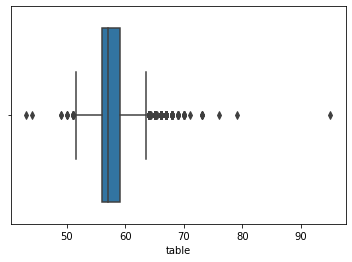

In [9]:
sns.boxplot(x=df['table'])

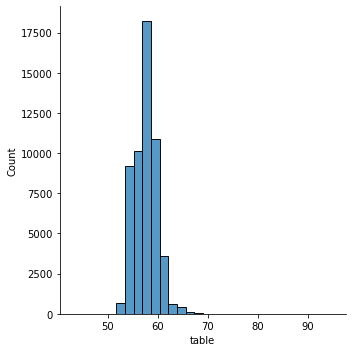

In [12]:
sns.displot(x='table',data=df,bins=30,kde=False)

In [16]:
df['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [17]:
df.shape

(53940, 10)

In [19]:
df=df.dropna()

In [20]:
df.shape

(53940, 10)

In [22]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Normal Drop  OUTLIER

In [25]:
Q1=df['table'].quantile(0.25)

In [26]:
Q3=df['table'].quantile(0.75)

In [27]:
IQR=Q3-Q1

In [28]:
IQR

3.0

In [32]:
low_line=Q1-1.5*IQR
high_line=Q3+1.5*IQR

In [33]:
low_line

51.5

In [35]:
high_line

63.5

<AxesSubplot:xlabel='table'>

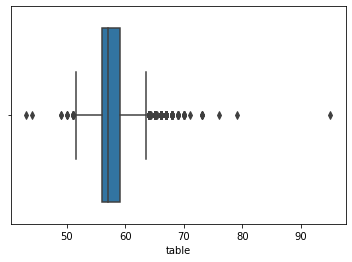

In [36]:
sns.boxplot(x='table',data=df)

In [37]:
outlier_low=df['table']<low_line

In [38]:
outlier_high=df['table']>high_line

In [39]:
outlier_low

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [40]:
outlier_low.value_counts()

False    53924
True        16
Name: table, dtype: int64

In [41]:
outlier_high.value_counts()

False    53351
True       589
Name: table, dtype: int64

In [42]:
df['table'][outlier_high|outlier_low]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [43]:
df['table'][~(outlier_high|outlier_low)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [44]:
df=df[~(outlier_high|outlier_low)]

In [45]:
df.shape

(53335, 10)

<AxesSubplot:xlabel='table'>

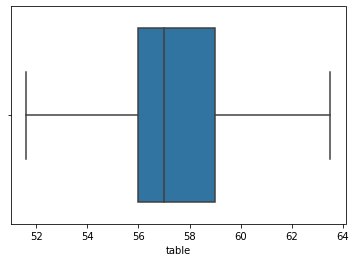

In [46]:
sns.boxplot(x='table',data=df)

<AxesSubplot:xlabel='table', ylabel='Count'>

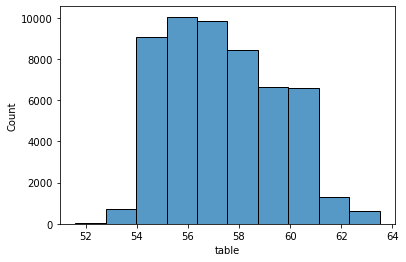

In [50]:
 sns.histplot(x='table',data=df,bins=10)

# Winsorize Method

In [55]:
from scipy.stats.mstats import winsorize


In [57]:
low_line

51.5

In [58]:
high_line

63.5

In [59]:
df2=winsorize(df,(0.01,0.02))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='carat'>

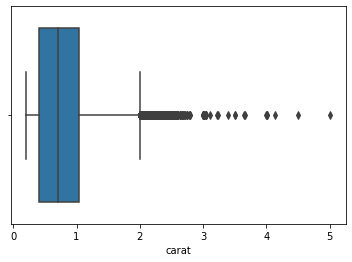

In [60]:
sns.boxplot(x='carat',data=df)

In [61]:
df_carat_log=np.log(df['carat'])

<AxesSubplot:xlabel='carat'>

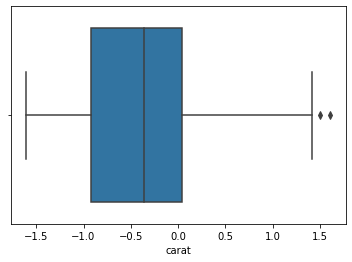

In [63]:
sns.boxplot(x=df_carat_log)

In [64]:
df_carat_log.describe()

count    53335.000000
mean        -0.397370
std          0.585213
min         -1.609438
25%         -0.916291
50%         -0.356675
75%          0.039221
max          1.611436
Name: carat, dtype: float64

In [65]:
df['carat'].describe()

count    53335.000000
mean         0.796297
std          0.473653
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [72]:
corr=df.corr()

In [75]:
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

,carat,depth,table,price,x,y,z
carat,1.0000000000,0.0282243143,0.1816175465,0.9215913012,0.9750942267,0.9517221990,0.9533873806
depth,0.0282243143,1.0000000000,-0.2957785215,-0.0106474046,-0.0252892470,-0.0293406707,0.0949238824
table,0.1816175465,-0.2957785215,1.0000000000,0.1271339021,0.1953442810,0.1837601471,0.1509286916
price,0.9215913012,-0.0106474046,0.1271339021,1.0000000000,0.8844351610,0.8654208979,0.8612494439
x,0.9750942267,-0.0252892470,0.1953442810,0.8844351610,1.0000000000,0.9747014797,0.9707717986
y,0.9517221990,-0.0293406707,0.1837601471,0.8654208979,0.9747014797,1.0000000000,0.9520057162
z,0.9533873806,0.0949238824,0.1509286916,0.8612494439,0.9707717986,0.9520057162,1.0000000000
